In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import pandas as pd


In [18]:
df = pd.read_excel('../Data/Iris.xls')
#Lấy và chia dữ liệu
iris_X = df[:][['sepallength','sepalwidth','petallength','petalwidth']]
iris_y = df[:]['species']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, test_size=50)
#Chia thành 2 tập Test và Train
print("Training size: %d" %len(y_train))
print("Test size    : %d" %len(y_test))

Training size: 100
Test size    : 50


Trước khi sử lí dữ liệu
Kết quả sau khi Test: 94.00 %


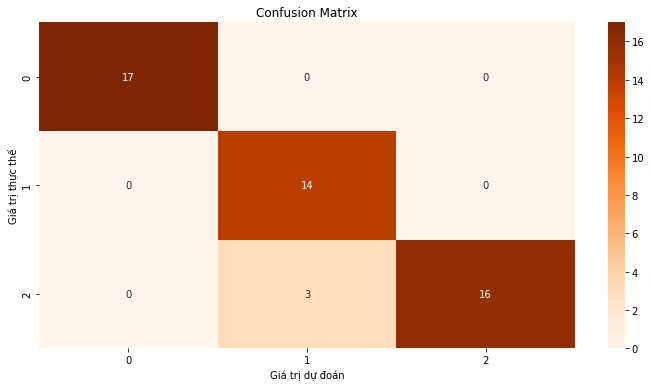

In [20]:

clf = DecisionTreeClassifier()
#Huấn luyện
clf.fit(X_train,y_train)
#Test
y_pred = clf.predict(X_test)
print("--------------------------Trước khi sử lí dữ liệu--------------------------")
print("Kết quả sau khi Test: %.2f %%" %(100*accuracy_score(y_true = y_test, y_pred=y_pred)))
#Confusion Matrix
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Oranges')
plt.ylabel("Giá trị thực thế")
plt.xlabel("Giá trị dự đoán")
plt.show()


#Eblow
distortions = []
K = range(1,10)
for k in K:
    tree = DecisionTreeClassifier(max_depth=k)
    tree.fit(X_train, y_train)
    pred_i = tree.predict(X_test)
    distortions.append(np.mean(pred_i != y_test))

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
    

Sau khi sử lí dữ liệu
Kết quả sau khi Test: 94.00 %


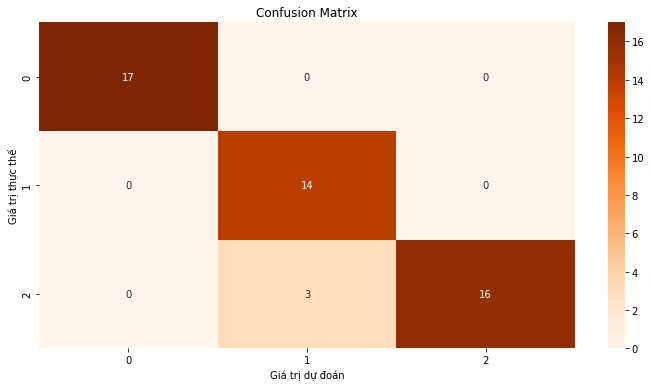

In [21]:
pipeline_dt = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=4)),
                    ('dts', DecisionTreeClassifier())])
pipeline_dt.fit(X_train,y_train)
y_pred2 = pipeline_dt.predict(X_test)
print("-----------------------------Sau khi sử lí dữ liệu--------------------------------")
print("Kết quả sau khi Test: %.2f %%" %(100*accuracy_score(y_true = y_test, y_pred=y_pred2)))

#Confusion Matrix
cm = confusion_matrix(y_test,y_pred2)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Oranges')
plt.ylabel("Giá trị thực thế")
plt.xlabel("Giá trị dự đoán")
plt.show()

#Eblow
distortions = []
K = range(1,10)
for k in K:
    pipeline_dt = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=2)),
                    ('dts', DecisionTreeClassifier())])
    pipeline_dt.fit(X_train,y_train)
    pred_i = clf.predict(X_test)
    distortions.append(np.mean(pred_i != y_test))
   
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()